 # Enfriamiento simulado

Es un algoritmo de búsqueda metaheurística para problemas de optimización global; el objetivo general de este tipo de algoritmos es encontrar una buena aproximación al valor óptimo de una función en un espacio de búsqueda grande. A este valor óptimo se lo denomina "óptimo global".

## Abejas vs Pesticidas

El uso excesivo de agroquímicos en los campos está comprometiendo el futuro de las abejas, desencadenando consecuencias que pueden ir más allá de los aspectos ambientales pues estos insectos polinizan los principales cultivos del mundo. Se estima que el 75 por ciento de la alimentación humana depende directa o indirectamente de la acción de los insectos polinizadores.

### Conceptualización

Un pesticida es un compuesto químico que tiene la importancia para el control de plagas en la agricultura. Debido a lo anterior los pesticidas no solamente matan plagas de insectos que afectan los cultivos, sino que también poblaciones de abejas melíferas, las cuales benefician el medio ambiente.

Las abejas son los mayores polinizadores de muchas plantas silvestres y monocultivo. Motivo por el cual, su población es fundamental para la productividad agrícola mundial y es evidente que las alteraciones en sus poblaciones podrían derivar en significativas pérdidas económicas.

La situación actual de las abejas es preocupante, debido a que el censo poblacional ha disminuido drásticamente por el uso extensivo de pesticidas en monocultivos tecnificados que buscan potenciar el rendimiento de la producción.

Los pesticidas son sustancias producidas de forma natural o industrial para destruir organismos potencialmente perjudiciales para las plantas cultivadas y/o animales de producción. Así mismo, se clasifican de acuerdo con el tipo de peste que controlan en: insecticidas (contra insectos), herbicidas (flora arvense), rodenticidas (roedores), bactericidas (bacterias), fungicidas (hongos) y larvicidas (larvas).

Estas sustancias pueden ser tóxicas a su vez para las especies que comparten el sitio de fumigación y, dependiendo de la dosificación, pueden tener una acción letal o subletal; a la par, permanecer residualmente en el medio ambiente.

### Planteamiento

Con base a lo anterior un pesticida contempla tres propiedades inherentes, las cuales son composición, forma de aplicación y residualidad:

**Composición:** Está compuesto por varios químicos incluyendo un ingrediente activo que es el químico que mata, controla o repele plagas.

**Exposición:** La exposición de las abejas se puede presentar por contacto, por alimentación o por las dos situaciones combinadas.

**Aplicación:** Las formas de aplicación de los pesticidas con sus respectivas características, son espolvoreo, pulverización, fumigación, aplicación de cebos, tratamientos vía riego y aplicación en el suelo.

**Residuality:** La residualidad del pesticida es un resultado de diversos factores, como la forma y sitio de aplicación, dosis, grado de infestación de la plaga y nivel de control o riesgo, exposición a microorganismos y materia orgánica.

Teniendo en cuenta las características mencionadas de los pesticidas, se desea saber cómo deben combinarse estas cuatro características para saber el grado de toxicidad potencial del pesticida y así minimizar la tasa de mortalidad de las poblaciones de abejas melíferas. Para llegar a este resultado hay que tener presente que:

* El porcentaje de ingrediente activo en el compuesto puede ser variable.
* Algunos pesticidas son: Corrosivos, irritantes, inflamables o explosivos.
* La forma de aplicación puede ser cualquiera de las mencionadas anteriormente.
* La residualidad  depende de las condiciones de la aplicación.
* La exposición de las abejas a los pesticidas puede ser por contacto, alimentación o ambas.
* El grado de toxicidad potencial del ingrediente activo puede ser: De baja peligrosidad, nocivo, toxico, muy tóxico.

La idea es que el modelo se pueda aplicar para cualquier combinación de cultivo-plaga


# Librerías

In [176]:
import numpy as np
import random
import operator
import pandas as pd
import matplotlib.pyplot as plt

# Representación de los datos

Los **cromosomas** del individuo para encontrar una posible solución al problema de las Abejas vs Pesticidas, estan representados pos las siguientes clases:

* Cromosoma **Ingrediente** define el ingrediente activo utilizado para un determinado cultivo (Lista de posibles ingredientes activos utilizados para un determinado cultivo) presente en el compuesto y respectiva clasificación (Corrosivo, irritante, inflamable o explosivo).
* Cromosoma **Exposicion** define si la exposición que presentan las abejas mielíferas al ingreduente activo es por contacto, alimentación o ambas.
* Cromosoma **Aplicacion** define la forma en la que es aplicado el pesticida en el cultivo (espolvoreo, pulverización, fumigación, aplicación de cebos, tratamientos vía riego y aplicación en el suelo)
* Cromosoma **Residualidad** define el tiempo en días que el ingrediente activo esta presente en el ecosistema

Cada uno de los **individuos** del algoritmo genético esta representado por la clase **Combinacion**, la cual es la unión de las clases anteriormente mencionadas más el porcentaje de concentración del ingrediente activo:

* Clase **Compuesto** define el nombre del ingrediente activo presente en el compuesto

In [177]:
class Ingrediente:
    def __init__(self, ingrediente = None, clasificacion = []):
        self.ingrediente = ingrediente
        self.clasificacion = clasificacion

class Exposicion:
    def __init__(self, forma = None):
        self.forma = forma

class Aplicacion:
    def __init__(self, tipo = None):
        self.tipo = tipo

class Residualidad:
    def __init__(self, tiempo = None):
        self.tiempo = tiempo

class Combinacion:
    def __init__(self, concentracion, ingrediente = Ingrediente(), exposicion = Exposicion(), aplicacion = Aplicacion(), residualidad = Residualidad()):
        self.concentracion = concentracion
        self.exposicion = exposicion
        self.ingrediente = ingrediente
        self.aplicacion = aplicacion
        self.residualidad = residualidad

# ¿Cual es el problema a resolver?

El objetivo es calcular la toxicidad potencial de cada individuo por la combinación de la concentración de un ingrediente activo específico, la forma de exposición, el tipo de aplicación y la residualidad  para cualquier cultivo en el cual se aplique algún tipo de pesticida, vamos a simular un caso particular para un cultivo dado, aplicando varios posibles pesticidas especializados en el cultivo seleccionado.

## Problema

La simulación

In [178]:
clasificacion = {
  1: 1, # Corrosivo
  2: 2, # Irritante
  3: 3, # Inflamable
  4: 4 # Explosivo
}

exposicion = {
  1: 1, # Contacto
  2: 2, # Alimentación
  3: 3 # Ambas
}

aplicacion = {
  1: 1, # Espolvoreo
  2: 2, # Contactopulverización
  3: 3, # Fumigación
  4: 4, # Aplicación de cebos
  5: 5, # Tratamientos vía riego
  6: 6 # Aplicación en el suelo
}

residualidad = {}
for i in range(1,90):
    residualidad[i] = i

## Aptitud
Para este caso, el costo de una solución es el calculo de la toxicidad del mismo que esta dado por la combinación de la concentración de un ingrediente activo específico, la forma de exposición, el tipo de aplicación y la residualidad como se menciono anteriormente y dicha aptitud esta dada por la formula:

>$Aptitud=RC+[\sum_{i=1}^{N} RCI(Valor_{i})]+[\sum_{i=1}^{N} RFE(Valor_{i})]+[\sum_{i=1}^{N} RFA(Valor_{i})]+[\sum_{i=1}^{N} RTR(Valor_{i})]$

>$RC = 1/(1,1 - concentración)$

### Descripción

>**RC** = Riesgo por concentración

>**RCI** = Riesgo por clasificación del ingrediente activo

>**RFE** = Riesgo por forma de exposición

>**RFA** = Riesgo por forma de aplicación

>**RTR** = Riesgo por tiempo de residualidad

Definimos la función para calcular el costo para todas las posibles soluciones, está formula fue construida con base a lo expuesto anteriormente. La función hace el sumatorio de puntos de riesgo acumulados por cada uno de los individuos y buscando los individuos que tengan menor temperatura (toxicidad potencial).

In [179]:
class Costo:
    def __init__(self, combinacion):
        self.combinacion = combinacion
        self.riesgo = 0

    def calculoCosto(self):
        suma = 1/ (1.1 - self.combinacion.concentracion)
        if self.combinacion.ingrediente.clasificacion in clasificacion:
            suma = suma + clasificacion[self.combinacion.ingrediente.clasificacion]
        if self.combinacion.exposicion.forma in exposicion:
            suma = suma + exposicion[self.combinacion.exposicion.forma]
        if self.combinacion.aplicacion.tipo in aplicacion:
            suma = suma + aplicacion[self.combinacion.aplicacion.tipo]
        if self.combinacion.residualidad.tiempo in residualidad:
            suma = suma + residualidad[self.combinacion.residualidad.tiempo]
        self.riesgo = suma
        return self.riesgo

## Funciones

In [180]:
#Creamos la solcución inicial de forma aleatoría.
def solucionInicial(n_vecindarios, n_vecinos):
    vecindarios = []
    for j in range(0, n_vecindarios):
        soluciones = []
        for i in range(0, n_vecinos):
            soluciones.append(Combinacion(
                concentracion=random.random(),
                ingrediente=Ingrediente("Ingrediente activo " + str(i + 1), random.randint(1, 4)),
                exposicion=Exposicion(random.randint(1, 3)),
                aplicacion=Aplicacion(random.randint(1, 6)),
                residualidad=Residualidad(random.randint(1, 90))
                )
            )
        vecindarios.append(soluciones)
    return vecindarios

#Creamos una función que para obtener un vecino de cualquier solución
def vecino(solution):
    i1 = np.random.randint(len(solution))
    return solution[i1]

def vecino1(solution):
    i1 = np.random.randint(len(solution))
    i2 = i1+1 if i1<len(solution)-1 else 0
    r = np.copy(solution)
    r[i1]=solution[i2]
    r[i2]=solution[i1]
    return r

def vecino2(solution):
    return vecino1(vecino1(solution))

## Algoritmo de enfriamiento simulado
Hemos un bucle bajando la temperatura.

In [181]:
def algoritmo(n_vecindarios, n_vecinos, pasos_enfrimiento):
    varios = []

    mejorCosto = []
    costoMedio = []
    desviacionCosto  = []

    inicial=solucionInicial(n_vecindarios, n_vecinos)

    costoMinimo = np.inf
    minimoSolucion  = None

    for T in range(1, pasos_enfrimiento+1):
        costs = []
        for i in range(len(inicial)):
            sol = inicial[i]

            if type(sol) is not Combinacion:
                vecinito = vecino(sol)
                costoSolucion = Costo(vecinito).calculoCosto()
                costoVecino = Costo(vecinito).calculoCosto()

                if costoVecino<costoSolucion or np.random.random()<T:
                    sol = vecinito
                    costoSolucion = costoVecino

                inicial[i] = sol
                costs.append(costoSolucion)

                if costoSolucion < costoMinimo:
                    minimoSolucion  = np.copy(inicial[i])
                    costoMinimo = Costo(inicial[i]).calculoCosto()
            else:
                costoMinimo = Costo(sol).calculoCosto()

        if len(costs) > 0:
            mejorCosto.append(np.min(costs))
            costoMedio.append(np.mean(costs))
            desviacionCosto.append(np.std(costs))
            if T%50==0:
              print('Paso '+str(T),"Mejor costo: ",mejorCosto[i])

    costoMedio = np.array(costoMedio)
    desviacionCosto  = np.array(desviacionCosto)
    mejorCosto = np.array(mejorCosto)

    varios.append(minimoSolucion)
    varios.append(mejorCosto)
    varios.append(costoMedio)
    varios.append(desviacionCosto)

    plt.plot(mejorCosto)
    plt.ylabel('Costo')
    plt.xlabel('Pasos')
    plt.title('Mejor costo vs enfriamiento')
    plt.tight_layout()
    plt.show()

    return varios

## Pruebas
Realizamos las pruebas del algoritmo de enfrimiento simulado previamente programado.

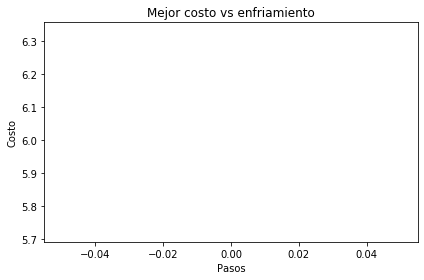

In [182]:
solucion=algoritmo(n_vecindarios=100, n_vecinos=100, pasos_enfrimiento=100)

## Investigaciones y Artículos

[1] [Guía de Evaluación de Riesgos de Plaguicidas para las Abejas](https://espanol.epa.gov/sites/production-es/files/2017-12/documents/120517_guia_de_evaluacion_de_riesgos_de_plaguicidas_para_las_abejas_update.pdf)

[2] [Abejas y Agrotóxicos](https://www.apiservices.biz/documents/articulos-es/abejas_y_agrotoxicos.pdf)

[3] [Los plaguicidas, adsorción y evolución en el suelo](https://digital.csic.es/bitstream/10261/12919/1/plaguicidas.pdf%3B)

[4] [Calculo de la toxicidad potencial de los plaguicidas](https://www.tdx.cat/bitstream/handle/10803/6827/06CAPITOL5.pdf?sequence=6&isAllowed=y)

[5] [Desarrollo de métodos para la reducción de la contaminación por plaguicidas en aguas subterráneas mediante la adición de residuos orgánicos a los suelos](https://idus.us.es/bitstream/handle/11441/41630/Tesis%20completa%20(enviar).pdf)

[6] [Daño colateral en abejas por la exposición a pesticidas de uso agrícola](http://www.scielo.org.co/pdf/entra/v14n1/1900-3803-entra-14-01-232.pdf)

[7] [Insecticidas más tóxico para las abejas ¿Por qué?](https://agriculturers.com/insecticidas-mas-toxico-para-las-abejas-por-que/)

[8] [Residualidad de un herbicida](https://www.rainbowconosur.com/uy/detalle-de-residualidad-de-un-herbicida-194)

